## MVP version 1.0

In [1]:
import pandas as pd
from dash import Dash, html, dcc
import plotly.express as px
from jupyter_dash import JupyterDash

In [2]:
data = pd.read_csv('/Users/rafaelcyin/Documents/GitHub/Bestfer_Solution_JN/data/data.csv')

In [3]:
data = data.dropna()

In [4]:
data = data[data['Ativo'].str.contains('N') == False]

In [5]:
column_name = list(data.columns)

In [6]:
total_units = [data[column_name[5]].sum(),data[column_name[6]].sum(),data[column_name[7]].sum(),data[column_name[8]].sum(),data[column_name[9]].sum(),data[column_name[10]].sum()]
months = [column_name[5],column_name[6],column_name[7],column_name[8],column_name[9],column_name[10]]
index = ['Total Units']
units_data = {'Total Units Sold' : total_units, 'Months' : months}

In [7]:
units_df = pd.DataFrame(units_data)
units_df

,Total Units Sold,Months
0,774161.90,Feb-22
1,1096649.92,Mar-22
2,1012810.00,Apr-22
3,915310.00,May-22
4,827942.00,Jun-22
5,884163.00,Jul-22


**Create Fig 1**

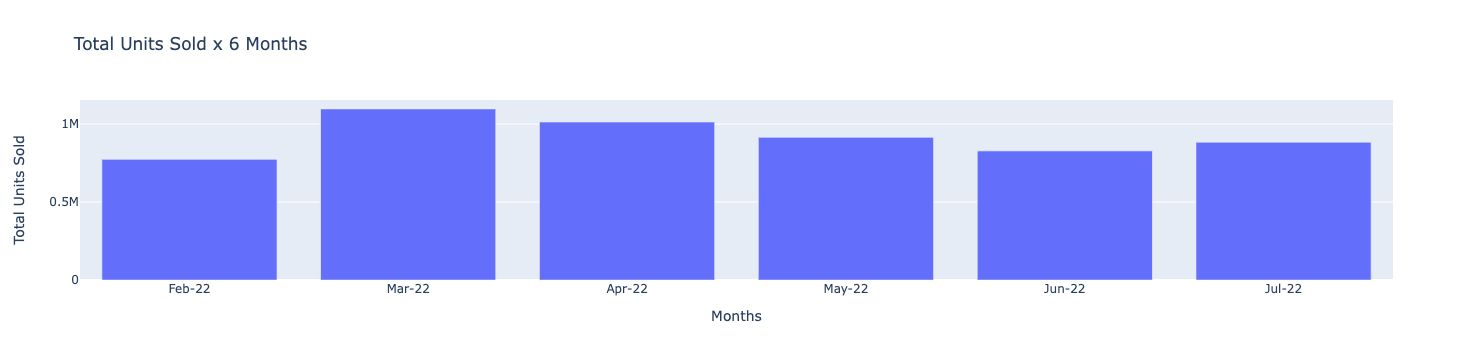

In [8]:
fig1 = px.bar(units_df, x = 'Months', y = 'Total Units Sold', title='Total Units Sold x 6 Months')
fig1

In [9]:
avg_price = data['Venda'].mean()

In [10]:
sales_df = units_df

In [11]:
sales_df["Total Units Sold"] = avg_price * sales_df["Total Units Sold"]

In [12]:
sales_df = sales_df.rename(columns = {'Total Units Sold' : 'Total Sales'})

**Create Fig 2**

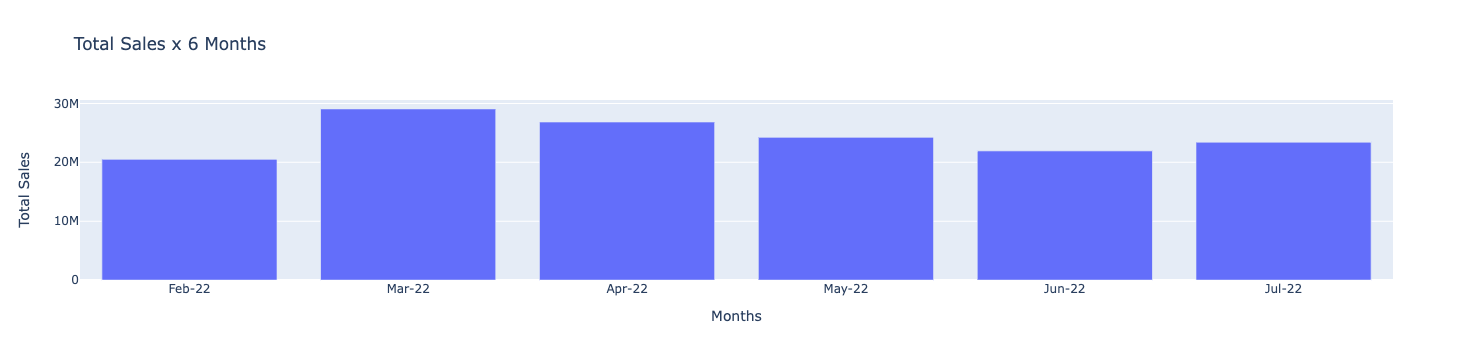

In [17]:
fig2 = px.bar(sales_df, x = 'Months', y = 'Total Sales', title='Total Sales x 6 Months')
fig2

## Create Dashboard

In [13]:
app = Dash(__name__)

**App Layout**

In [18]:
app.layout = html.Div(children=[html.H1(children='Bestfer Dashboard'),
                                        dcc.Graph(
                                            id='figure1',
                                            figure=fig1
                                        ),
                                        dcc.Graph(
                                            id='figure2',
                                            figure=fig2
                                        )
                                        ])

In [ ]:
app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050 (Press CTRL+C to quit)
127.0.0.1 - - [12/Aug/2022 19:03:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2022 19:03:10] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2022 19:03:10] "GET /_favicon.ico?v=2.3.1 HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2022 19:03:10] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2022 19:03:10] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [12/Aug/2022 19:03:10] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [12/Aug/2022 19:03:10] "GET /_favicon.ico?v=2.3.1 HTTP/1.1" 200 -
